In [202]:
import pandas as pd

In [203]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
print(df)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
print(df)

       3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]
      variance  skewness  curtosis  entropy  class
0      4.54590   8.16740   -2.4586 -1.46210      0
1      3.86600  -2.63830    1.9242  0.10645      0
2      3.45660   9.52280   -4.0112 -3.59440      0
3      0.32924  -4.45520    4.5718 -0.98880      0
4      4.36840   9.67180   -3.9606 -3.16250      0
...        ...       ...       ...      ...    ...
1366   0.40614   1.34920   -1.4501 -0.55949      1
1367  -1.38870 

In [204]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [205]:
# data has no null values, now check its description
df.describe()

,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   curtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<function matplotlib.pyplot.show(close=None, block=None)>

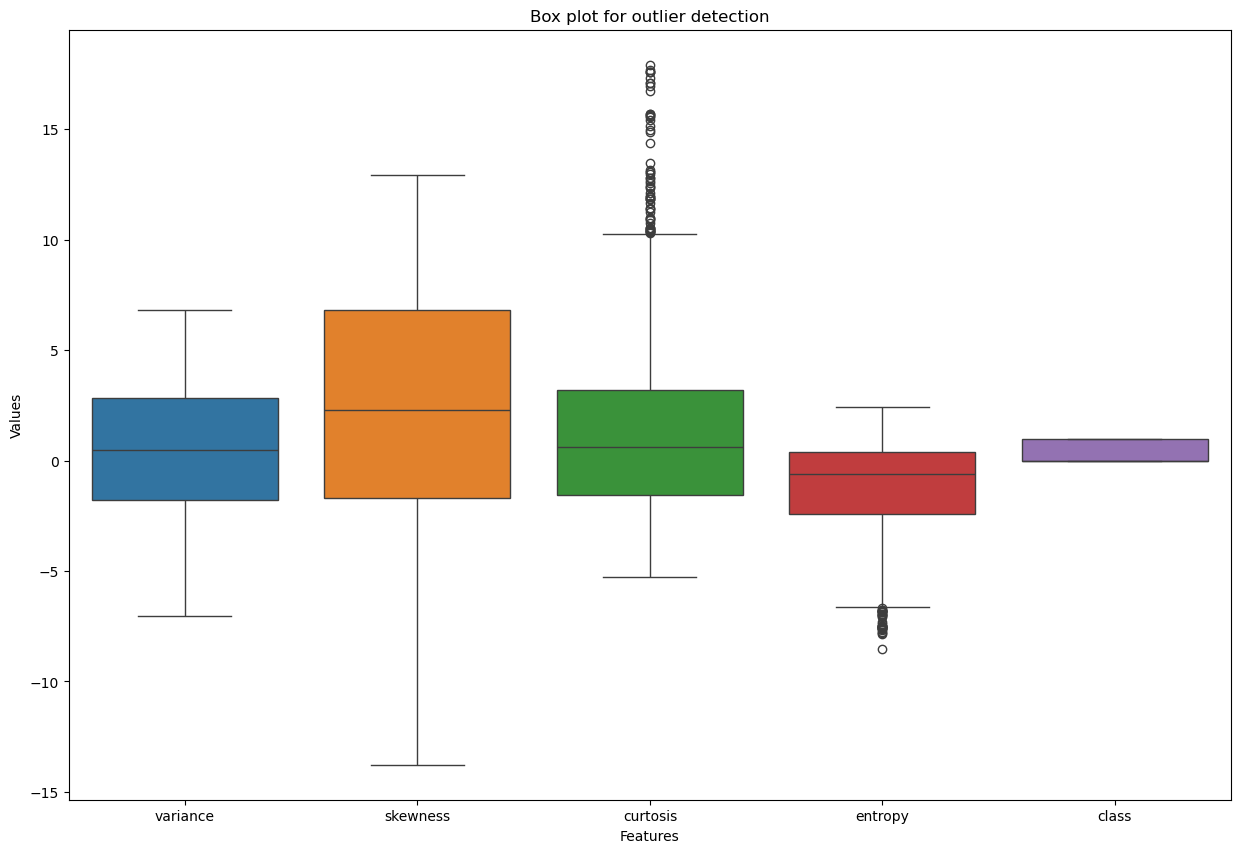

In [207]:
# no categorical features so no need of encoding, we check for outliers using boxplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title("Box plot for outlier detection")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show

In [208]:
# we can see outliers in the curtosis and entropy feature, so now we move on to outlier handling
def detect_outlier_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  outlier = ((data<lower_bound)|(data>upper_bound)).sum()
  return outlier

outlier_count = df.apply(detect_outlier_iqr)
print(outlier_count)

variance     0
skewness     0
curtosis    60
entropy     33
class        0
dtype: int64


In [209]:
# there are 60 outliers in curtosis column, and 33 outliers in entropy column, we use IQR for capping
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-3*iqr
    upper_bound = q3+3*iqr
    df.loc[(df[column]<lower_bound),column] = lower_bound
    df.loc[(df[column]>upper_bound),column] = upper_bound
   
print(df)

      variance  skewness  curtosis  entropy  class
0      4.54590   8.16740  -2.45860 -1.46210      0
1      3.86600  -2.63830   1.92420  0.10645      0
2      3.45660   9.52280  -4.01120 -3.59440      0
3      0.32924  -4.45520   4.57180 -0.98880      0
4      4.36840   9.67180  -3.96060 -3.16250      0
...        ...       ...       ...      ...    ...
1366   0.40614   1.34920  -1.45010 -0.55949      1
1367  -1.38870  -4.87730   6.47740  0.34179      1
1368  -3.75030 -13.45860  17.38645 -2.77710      1
1369  -3.56370  -8.38270  12.39300 -1.28230      1
1370  -2.54190  -0.65804   2.68420  1.19520      1

[1371 rows x 5 columns]


In [210]:
# splitting dependent and independent variables
x_unscaled=df.drop(columns=['class'])
y=df['class']
print(x_unscaled)
print(y)

      variance  skewness  curtosis  entropy
0      4.54590   8.16740  -2.45860 -1.46210
1      3.86600  -2.63830   1.92420  0.10645
2      3.45660   9.52280  -4.01120 -3.59440
3      0.32924  -4.45520   4.57180 -0.98880
4      4.36840   9.67180  -3.96060 -3.16250
...        ...       ...       ...      ...
1366   0.40614   1.34920  -1.45010 -0.55949
1367  -1.38870  -4.87730   6.47740  0.34179
1368  -3.75030 -13.45860  17.38645 -2.77710
1369  -3.56370  -8.38270  12.39300 -1.28230
1370  -2.54190  -0.65804   2.68420  1.19520

[1371 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64


In [211]:
# feature scaling
from sklearn.preprocessing import StandardScaler # we saw from boxplot that data is mostly normally distributed
scaler = StandardScaler()
x = scaler.fit_transform(x_unscaled)

In [232]:
# split traning and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 36)


In [234]:
# importing model
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [236]:
y_pred=model.predict(x_test)

In [238]:
# evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
report=classification_report(y_test,y_pred)
print("\nClassification Report:\n",report)

Accuracy:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       121

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

